In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset = pd.read_csv(r"C:\Users\jpart\pythonn\pandas\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.shape,dataset.columns,dataset.dtypes


((7043, 21),
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'),
 customerID           object
 gender               object
 SeniorCitizen         int64
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies      object
 Contract             object
 PaperlessBilling     object
 PaymentMethod        object
 MonthlyCharges      float64
 TotalCharges         object
 Churn             

In [5]:
dataset.drop("customerID",axis=1,inplace=True)

In [6]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"],errors= 'coerce')
dataset["TotalCharges"] = dataset["TotalCharges"].fillna(dataset["TotalCharges"].mean())

In [8]:
for column in dataset.columns:
    if dataset[column].dtype == np.object_:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [9]:
x = dataset.iloc[:,:-1]
y = dataset["Churn"]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

C:\Users\jpart\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [31]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(81.68914123491838, 80.04969826056087)

In [27]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [32]:
rf.score(x_test,y_test)*100,rf.score(x_train,y_train)*100 #overfitting model

(79.347054648687, 99.78700745473908)

In [15]:
prd = lr.predict(x_test)

In [16]:
cm = confusion_matrix(y_test,prd)
cr = classification_report(y_test,prd)
s = accuracy_score(y_test,prd)   


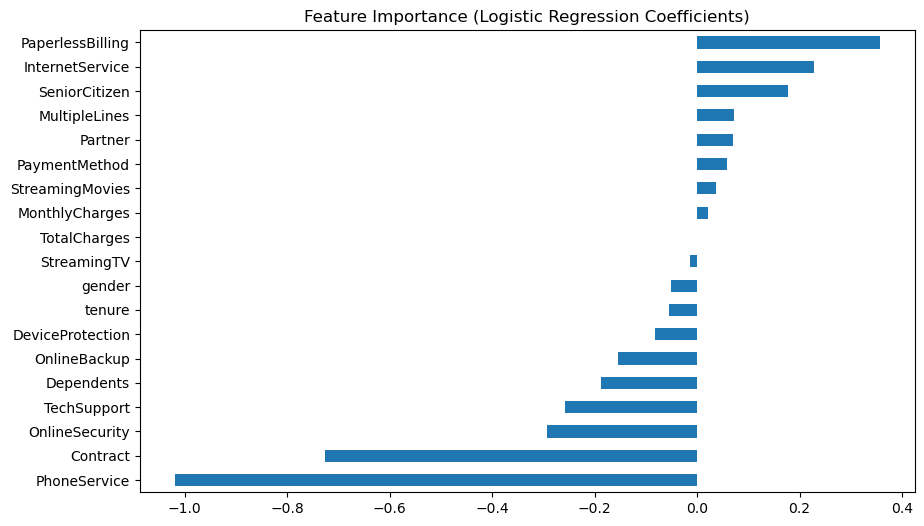

In [17]:
coefficients = pd.Series(lr.coef_[0], index=x.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()